출처 : https://www.kaggle.com/code/ibrahimbahbah/non-linear-regression-tutorial/notebook

# 비선형 사용 이유

데이터가 직선을 벗어난 곡선 추세를 보이는 경우 선형 회귀는 비선형 회귀에 비해 정확한 결과를 생성하지 않습니다. 그리하여 사용하는 것이 비선형 회귀입니다.

필수 라이브러리 가져오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 선형 회귀(Linear)

선형 회귀는 Y = 4x + 5와 같이 1차수의 방정식으로 표현합니다.

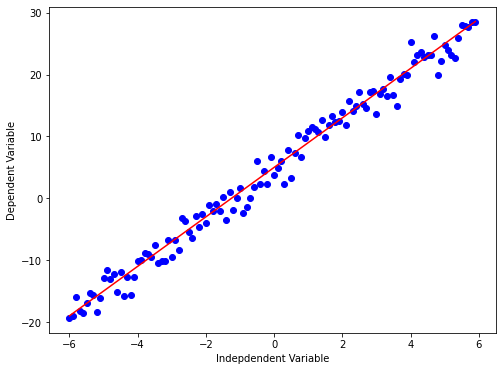

In [2]:
x = np.arange(-6.0, 6.0, 0.1) # -6 ~ 6 까지 0.1 간격으로 배열 생성
y = 4*(x) + 5 # 데이터 생성
y_noise = 2 * np.random.normal(size=x.size) # # x.size(120)개의 평균 0, 표준편차 1의 정규분포에 2를 곱한 오차 생성
ydata = y + y_noise # 모델 학습용 데이터 생성
plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo') 
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()


# 다항 회귀(Polynomial)

비선형 회귀는 Y = ax3 + bx2 + cx + d 와 같이 다차수의 방정식으로 표현합니다.

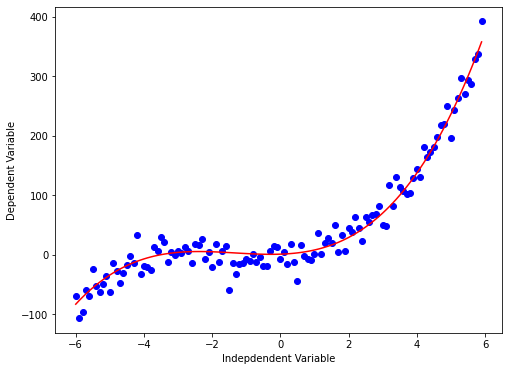

In [3]:
x = np.arange(-6.0, 6.0, 0.1) # -6 ~ 6 까지 0.1 간격으로 배열 생성
y = 1*(x**3) + 4*(x**2) + 2*x + 1
y_noise = 20 * np.random.normal(size=x.size)  # x.size(120)개의 평균 0, 표준편차 1의 정규분포에 20을 곱한 오차 생성 
ydata = y + y_noise 
plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()


# 2차(Quafratic-Regression)

2차 함수는 Y = ax2 + b와 같이 표현합니다.


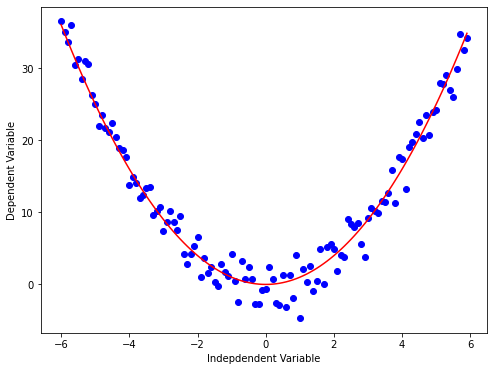

In [4]:
x = np.arange(-6.0, 6.0, 0.1)
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size) # x.size(120)개의 평균 0, 표준편차 1의 정규분포에 2를 곱한 오차 생성
ydata = y + y_noise
plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# 지수(exponential function-Regression)

지수 함수는 Y = a + bcx와 같이 표현합니다.
(여기서 b ≠0, c > 0, c ≠1, x는 임의의 실수입니다. 밑수 c는 상수이고 지수 x는 변수입니다.)


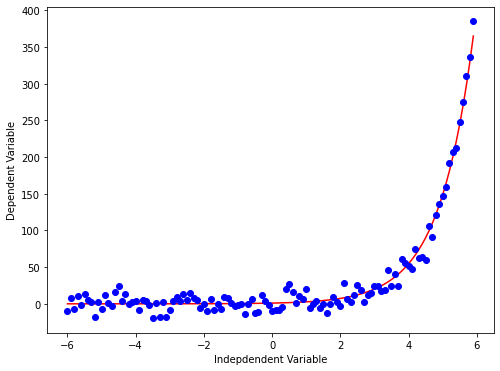

In [5]:
X = np.arange(-6.0, 6.0, 0.1)
Y= np.exp(X)
y_noise = 10 * np.random.normal(size=x.size) # x.size(120)개의 평균 0, 표준편차 1의 정규분포에 10를 곱한 오차 생성
ydata = Y + y_noise
plt.figure(figsize=(8,6))
plt.plot(X,Y, 'r') 
plt.plot(X, ydata, 'bo')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()


# 로그(Logarithmic-Regression)

로그 함수는 Y = a * log(x)와 같이 표현합니다.


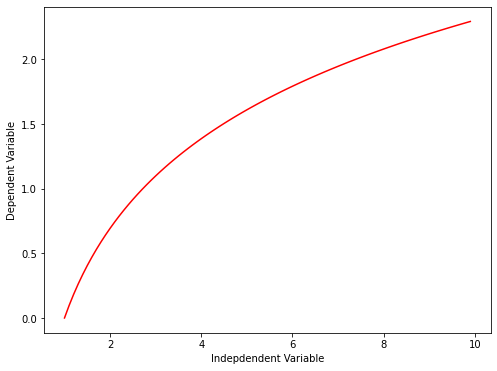

In [6]:
X = np.arange(1.0, 10.0, 0.1)
Y = np.log(X)
plt.figure(figsize=(8,6))
plt.plot(X,Y,'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# 시그모이드/로지스틱(Sigmoidal/Logistic-Regression)

시그모이드/로지스틱 함수는 Y = a+b/1+c(x-d)와 같이 표현합니다.


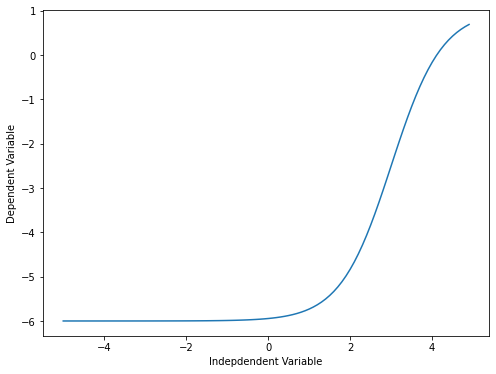

In [7]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1-7/(1+np.power(5, X-3))
plt.figure(figsize=(8,6))
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()


# 비선형 함수 활용 예시

In [8]:
import pandas as pd
path='./china_gdp.csv'
# 출처 : https://www.kaggle.com/code/ibrahimbahbah/non-linear-regression-tutorial/data
df = pd.read_csv(path)
df.head(10) # ‘Year’, ‘Value’가 열 이름이고 연도, 수 데이터를 가짐

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [9]:
df.shape # (55, 2), 55행 2열의 데이터

(55, 2)

In [10]:
df.info() # 각 열은 int64, float64 자료형을 가지고 null값이 없다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


In [11]:
df.describe() # 요약 확인

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


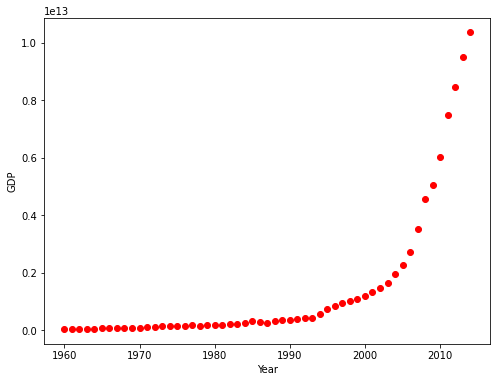

In [12]:
plt.figure(figsize=(8,6))
x_data, y_data = (df["Year"].values, df["Value"].values) # x_data, y_data에 ‘Year’ 값과 ‘Value’ 값을 각각 할당
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show() # 데이터의 그래프 출력

데이터의 그래프를 보면 지수 함수 그래프와 비슷하지만 중간에 상승되는 굴곡이 하나 더 보이는 점에서 로지스틱 함수의 특성과 유사하다.

# 데이터에 맞는 방정식 고안
Y^=1/1+eβ1(X−β2)
 
β1 : 커브의 급경사를 제어합니다.

β2 : x축의 커브를 슬라이드합니다.


# 데이터 방정식 함수

In [13]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

# 모델과 데이터 비교

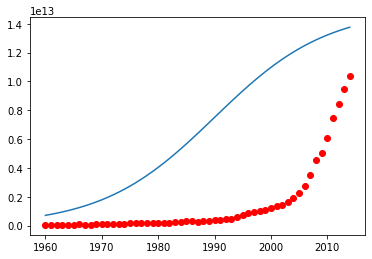

In [14]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')


# 데이터 방정식 파라미터 최적화

In [15]:
xdata =x_data/np.max(x_data) # x 정규화
ydata =y_data/np.max(y_data) # y 정규화

In [16]:
print(xdata, ydata)

[0.97318769 0.97368421 0.97418073 0.97467726 0.97517378 0.97567031
 0.97616683 0.97666336 0.97715988 0.97765641 0.97815293 0.97864945
 0.97914598 0.9796425  0.98013903 0.98063555 0.98113208 0.9816286
 0.98212512 0.98262165 0.98311817 0.9836147  0.98411122 0.98460775
 0.98510427 0.98560079 0.98609732 0.98659384 0.98709037 0.98758689
 0.98808342 0.98857994 0.98907646 0.98957299 0.99006951 0.99056604
 0.99106256 0.99155909 0.99205561 0.99255214 0.99304866 0.99354518
 0.99404171 0.99453823 0.99503476 0.99553128 0.99602781 0.99652433
 0.99702085 0.99751738 0.9980139  0.99851043 0.99900695 0.99950348
 1.        ] [0.0057156  0.00478589 0.00450854 0.00483806 0.00570384 0.00673204
 0.00732793 0.00695878 0.0067595  0.00760213 0.00883705 0.00951846
 0.01083164 0.01320831 0.01373801 0.01556399 0.01464318 0.01664431
 0.01432975 0.01707961 0.01831512 0.01877086 0.01965745 0.02211047
 0.02492384 0.02969431 0.02885665 0.02620514 0.03000746 0.03341025
 0.03466722 0.03683833 0.04103727 0.04276985 0.054

# 모델링

In [17]:
from scipy.optimize import curve_fit # 비선형 최소 제곱을 사용하여 시그모이드 함수를 데이터에 맞추는 함수
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#파라미터 출력
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453019, beta_2 = 0.997207


# 데이터 방정식과 데이터 그래프 출력

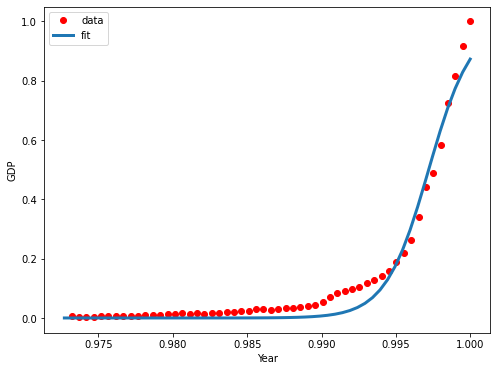

In [18]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,6))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# 회귀 모델 평가

In [19]:
# train, test data 나누기
msk = np.random.rand(len(df)) < 0.8 # 0~1의 균일분포 표준정규분포 난수 생성
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# 트레인 데이터를 이용해 모델링
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# 테스트 데이터를 이용해 예측
y_hat = sigmoid(test_x, *popt)

# 평가
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Mean absolute error: 0.24
Residual sum of squares (MSE): 0.14
R2-score: -63793375064083944587011293184.00
